In [1]:
import os
os.chdir("../")
import sys
sys.path.insert(0, ".")
from utils import *
from utils.paths import *
import utils.paths as p
from utils.plot import *

In [2]:
create_paths("DateWorld")

In [5]:
country_gdp = create_country_gdp("CountryData/GDP.txt")

In [6]:
country_population = create_country_population("CountryData/population.txt")

In [7]:
country_cumulative_death = create_country_cumulative_death(countries)

# Get Cumulative Death vs GDP for each country

In [9]:
df = pd.DataFrame(columns=["country", "gdp", "deaths"])
for country in countries:
    try:
        gdp = country_gdp[country]
        deaths = country_cumulative_death[country]
        population = country_population[country]
        if (gdp > 1 ) and (deaths > 1 and deaths < 500) and (population > 1):
            series = pd.Series([country, gdp, (deaths/population)], index=df.columns)
            df = df.append(series, ignore_index=True)
    except:
        pass

In [10]:
df_data = df.drop(["country"],axis=1)
df_data.to_csv("CountryData/gdp_deaths.csv")

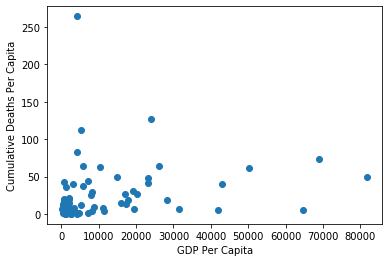

In [11]:
plt.clf()
plt.xlabel("GDP Per Capita")
plt.ylabel("Cumulative Deaths Per Capita")
plt.scatter(df_data['gdp'], df_data['deaths'])

# Cumulative Death Per Capita vs Population Density

In [12]:
country_area = create_country_area("CountryData/area.txt")

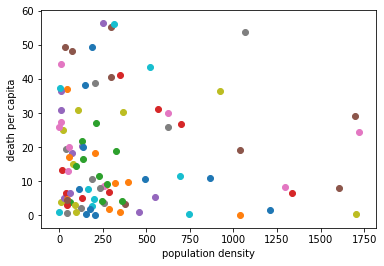

In [14]:
plt.clf()
plt.xlabel("population density")
plt.ylabel("death per capita")
for country in countries:
    try:
        population = country_population[country]
        area = country_area[country]
        deaths = country_cumulative_death[country]
        p_density = population / area
        d_capita = deaths / population

        if (p_density > 0 and p_density < 2000) and (d_capita > 0 and d_capita < 60):
            plt.scatter(p_density, d_capita)
    except:
        pass

# Peak Difference

- Diffenence of Tagged Day of peak new deaths and new confimed

In [15]:
country_peak_diff = create_country_peak_diff()

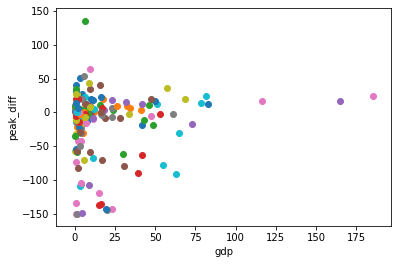

In [16]:
plt.clf()
plt.xlabel("gdp")
plt.ylabel("peak_diff")
for country in countries:
    try:
        peak_diff = country_peak_diff[country]
        gdp = country_gdp[country]
        plt.scatter(gdp/1000, peak_diff)
    except:
        pass

In [17]:
peak_diff_list = list(country_peak_diff.values())

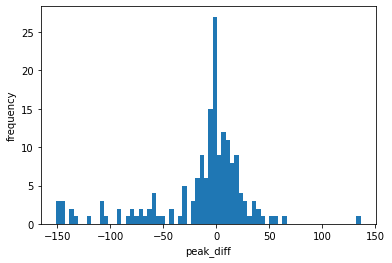

In [18]:
plt.clf()
plt.xlabel("peak_diff")
plt.ylabel("frequency")
a= plt.hist(peak_diff_list, 70)